In [2]:
import pandas as pd

dados = pd.read_csv('../dados/CSV_Completo.csv')
dados.head()

,Animal,Mês,Estação,Km,Trecho,Sentido,Trecho macro,Hora da Coleta,Tipo De Pistas,Numero de Pistas,...,Vazamento,Agua?,Vegetação Baixa?,capimAlto,Arbustos,Floresta,Local,Com filhotes?,Faixa de Horario,Faixa de Quilometragem
0,jacaré-de-papo-amarelo,4,Outono,114,2,JF,Baixada,01:55:00,Sem divisão,1,...,Desconhecido,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Pista de rolamento,Desconhecido,Entre 00 e 03,Entre 100 e 125
1,jararacussu,4,Outono,87,4,JF,Serra,09:10:00,Sem divisão,1,...,Desconhecido,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Pista de rolamento,Desconhecido,Entre 09 e 12,Entre 75 e 100
2,sabiá-laranjeira,5,Outono,82,5,JF,Serra,16:30:00,Sem divisão,1,...,Desconhecido,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Entre 15 e 18,Entre 75 e 100
3,capivara,6,Outono,65,7,RJ,Planalto,06:47:00,Defensa Metálica,2,...,Desconhecido,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Acostamento,Desconhecido,Entre 06 e 09,Entre 50 e 75
4,tamanduá-mirim,6,Outono,102,3,RJ,Serra,15:55:00,Defensa Metálica,2,...,Desconhecido,não,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Acesso/ Retorno,Desconhecido,Entre 15 e 18,Entre 100 e 125


Escolher o animal para ser estudado

In [3]:
animal = 'É animal mais atropelado'
animalEscolhido = 'rã-manteiga'

dados.loc[dados.Animal == animalEscolhido,animal] = 1
dados.loc[dados.Animal != animalEscolhido,animal] = 0


dados[animal] = dados[animal].astype(int)
 

removendo colunas indesejadas

In [4]:
del(dados['Animal'])
del(dados['Km'])
del(dados['Hora da Coleta'])

dados.head()

,Mês,Estação,Trecho,Sentido,Trecho macro,Tipo De Pistas,Numero de Pistas,Tipo de Pavimento,Numero de Faixas,Velocidade Maxima,...,Agua?,Vegetação Baixa?,capimAlto,Arbustos,Floresta,Local,Com filhotes?,Faixa de Horario,Faixa de Quilometragem,É animal mais atropelado
0,4,Outono,2,JF,Baixada,Sem divisão,1,Pavimento flexível (asfalto),4,110,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Pista de rolamento,Desconhecido,Entre 00 e 03,Entre 100 e 125,0
1,4,Outono,4,JF,Serra,Sem divisão,1,Pavimento rígido,2,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Pista de rolamento,Desconhecido,Entre 09 e 12,Entre 75 e 100,0
2,5,Outono,5,JF,Serra,Sem divisão,1,Pavimento semi-flexível,2,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Entre 15 e 18,Entre 75 e 100,0
3,6,Outono,7,RJ,Planalto,Defensa Metálica,2,Pavimento flexível (asfalto),4,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Acostamento,Desconhecido,Entre 06 e 09,Entre 50 e 75,0
4,6,Outono,3,RJ,Serra,Defensa Metálica,2,Pavimento flexível (asfalto),4,80,...,não,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Acesso/ Retorno,Desconhecido,Entre 15 e 18,Entre 100 e 125,0


In [5]:
from collections import OrderedDict

categorias = {}
# categorias['Mês'] = dados['Mês']

for i in dados:
      categorias[i] = dados[i]
      # categorias[i] = i
      

for feature in categorias:
  categorias[feature] = list(OrderedDict.fromkeys(categorias[feature]))

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in dados:
    dados[i] = le.fit_transform(dados[i])
    
# print(dados)


In [7]:
categorias_cod = {}

for i in dados:
    categorias_cod[i] = dados[i]
    
for feature in categorias_cod:
  categorias_cod[feature] = list(OrderedDict.fromkeys(categorias_cod[feature]))

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Mês                       13096 non-null  int64
 1   Estação                   13096 non-null  int32
 2   Trecho                    13096 non-null  int64
 3   Sentido                   13096 non-null  int32
 4   Trecho macro              13096 non-null  int32
 5   Tipo De Pistas            13096 non-null  int32
 6   Numero de Pistas          13096 non-null  int32
 7   Tipo de Pavimento         13096 non-null  int32
 8   Numero de Faixas          13096 non-null  int32
 9   Velocidade Maxima         13096 non-null  int32
 10  Tipo da Chuva             13096 non-null  int32
 11  Intervencao               13096 non-null  int32
 12  Vazamento                 13096 non-null  int32
 13  Agua?                     13096 non-null  int32
 14  Vegetação Baixa?          13096 non-nu

0    12915
1      181
Name: É animal mais atropelado, dtype: int64


<BarContainer object of 2 artists>

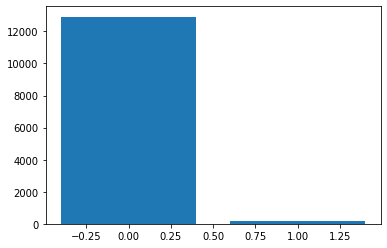

In [9]:
import numpy as np
import matplotlib.pyplot as plt

count = dados[animal].value_counts()
print(count)
plt.bar([0, 1], count) 

In [10]:
cod_cat = {}

for feature in categorias:
  cod_cat[feature] = {}
  for index, cat in enumerate(categorias[feature]):
    cods = categorias_cod[feature]
    cod_cat[feature].update({cods[index]:cat})

# print(cod_cat)

<BarContainer object of 2 artists>

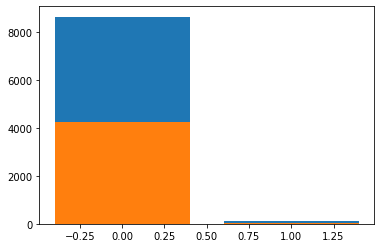

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

dadosTreino, dadosTeste = train_test_split(dados, test_size = 0.33, random_state = 0)

countTreino = dadosTreino[animal].value_counts()

countTeste = dadosTeste[animal].value_counts()

plt.bar([0, 1], countTreino) 
plt.bar([0, 1], countTeste) 

Separando X e Y

In [12]:
treino_y = dadosTreino.pop(animal)
treino_x = dadosTreino

teste_y = dadosTeste.pop(animal)
teste_x = dadosTeste

y = dados.pop(animal)
X = dados

In [13]:
from sklearn.naive_bayes import CategoricalNB

Categorical = CategoricalNB (alpha=0.1, min_categories=18)

Categorical.fit(treino_x, treino_y)
    
# testa modelo
y_predict = Categorical.predict(teste_x) # Pega as previsoes do modelo para os valores X de teste
y_true = teste_y


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4270
           1       0.10      0.44      0.16        52

    accuracy                           0.95      4322
   macro avg       0.55      0.70      0.57      4322
weighted avg       0.98      0.95      0.96      4322

Matriz de confusão


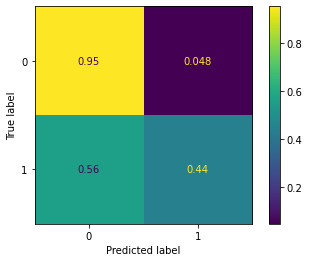

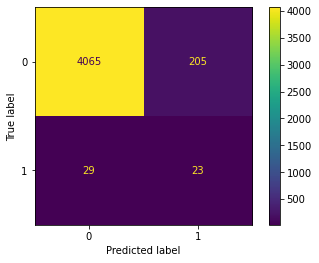

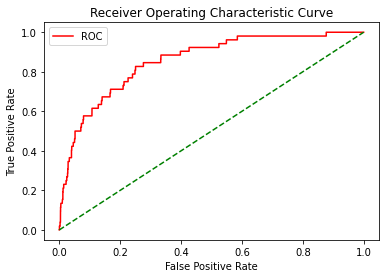

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(teste_y, y_predict, zero_division=0))

print("Matriz de confusão")
matriz_confusaoPorc = confusion_matrix(y_true, y_predict, normalize = 'true')
matrizPorc = ConfusionMatrixDisplay(matriz_confusaoPorc)
matrizPorc.plot()

matriz_confusao = confusion_matrix(y_true, y_predict)
matriz = ConfusionMatrixDisplay(matriz_confusao)
matriz.plot()
plt.show()

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
from sklearn.metrics import roc_curve

TargetVarScore = Categorical.predict_proba(teste_x)
fper, tper, thresholds = roc_curve(teste_y, TargetVarScore[:, 1])
plot_roc_curve(fper, tper)

In [15]:
# from openpyxl import Workbook, load_workbook

# file_name = 'resultados ' + animalEscolhido + '.xlsx'

# wb = Workbook()
# wb.save(file_name)

# ws1 = wb.create_sheet('matriz confusao')

# ws1['A1'] = "Matriz com os dados originais"
# ws1['A3'] = matriz_confusao

# wb.save(file_name)

Rodar o modelo com as melhores features

In [16]:
features = Categorical.feature_names_in_

feat_log_prob = Categorical.feature_log_prob_

dadosProbabilidades = pd.DataFrame()

atributos = []
prob1 = []
prob0 = []

for indexF, feature in enumerate(features):    
    atributos.append(feature)
    prob1.append("")
    prob0.append("")
    
    for indexC in cod_cat[feature]:
        atributos.append(cod_cat[feature][indexC])
        prob0.append(np.exp(feat_log_prob[indexF][0][indexC]))
        prob1.append(np.exp(feat_log_prob[indexF][1][indexC]))

dadosProbabilidades["Atributo"] = atributos
dadosProbabilidades["Probabilidade de indicar 0"] = prob0
dadosProbabilidades["Probabilidade de indicar 1"] = prob1

file_name = 'resultados ' + animalEscolhido + '.xlsx'
dadosProbabilidades.to_excel(file_name)


Antes de prosseguir, vamos selecionar as melhores features

In [17]:
from sklearn.feature_selection import SelectKBest, f_regression,  chi2

k = 10 # seleciona 10 features

sel_chi2 = SelectKBest(chi2, k = 10)

X_train_novo = sel_chi2.fit_transform(X, y)

print("os atributos escolhidos foram:")
atributosSelect = []
for j in sel_chi2.get_support(indices=True):
    atributosSelect.append(features[j])
    
print(atributosSelect)

colums = ["target"]
col2 = []
for i in range(k):
    colums.append(i)
    col2.append(i)

print(X_train_novo.shape)

novoDf = pd.DataFrame(X_train_novo, y).reset_index()
novoDf.columns = [colums]

novoX = novoDf[col2]
novoY = novoDf["target"]

os atributos escolhidos foram:
['Mês', 'Estação', 'Trecho', 'Trecho macro', 'Tipo De Pistas', 'Numero de Pistas', 'Numero de Faixas', 'Velocidade Maxima', 'Local', 'Faixa de Quilometragem']
(13096, 10)


x: (13096, 10)
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4262
           1       0.05      0.08      0.07        60

    accuracy                           0.97      4322
   macro avg       0.52      0.53      0.52      4322
weighted avg       0.97      0.97      0.97      4322

Matriz de confusão


c:\Users\rayss\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


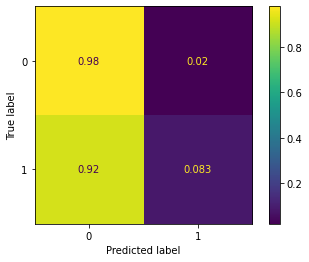

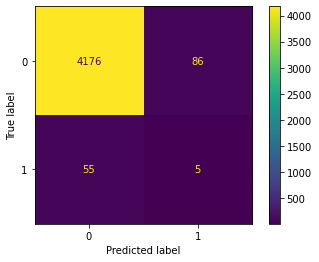

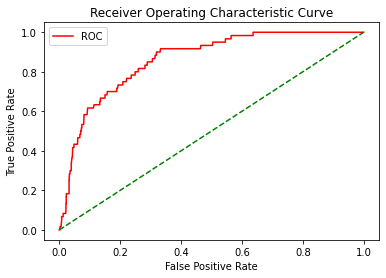

In [18]:
X_encoded = novoX.apply(LabelEncoder().fit_transform)
X = X_encoded.values
print("x:", X.shape)

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(X, novoY, test_size = 0.33,
                                                         stratify = y)

Categorical_filter = CategoricalNB (alpha=0.1, min_categories=18)

Categorical_filter.fit(treino_x, treino_y)
    
# testa modelo
y_predict = Categorical_filter.predict(teste_x) # Pega as previsoes do modelo para os valores X de teste
y_true = teste_y

print(classification_report(teste_y, y_predict))

print("Matriz de confusão")
matriz_confusaoPorc = confusion_matrix(y_true, y_predict, normalize = 'true')
matrizPorc = ConfusionMatrixDisplay(matriz_confusaoPorc)
matrizPorc.plot()

matriz_confusao = confusion_matrix(y_true, y_predict)
matriz = ConfusionMatrixDisplay(matriz_confusao)
matriz.plot()
plt.show()

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
from sklearn.metrics import roc_curve

TargetVarScore = Categorical_filter.predict_proba(teste_x)
fper, tper, thresholds = roc_curve(teste_y, TargetVarScore[:, 1])
plot_roc_curve(fper, tper)

Agora vamos balancear

c:\Users\rayss\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.77      0.87      4262
           1       0.04      0.73      0.08        60

    accuracy                           0.77      4322
   macro avg       0.52      0.75      0.48      4322
weighted avg       0.98      0.77      0.86      4322

Matriz de confusão


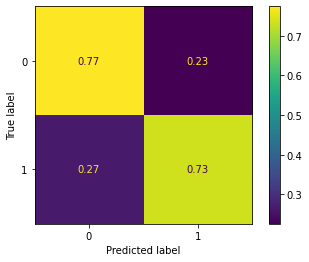

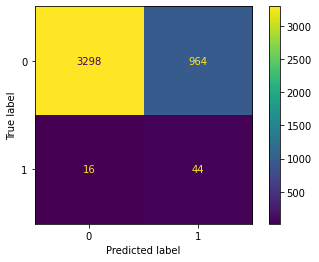

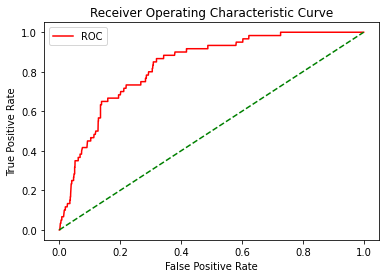

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(treino_x, treino_y)

CategoricalBalanced = CategoricalNB(alpha=0.1, min_categories=18)

# treina o modelo com os dados balanceados
CategoricalBalanced.fit(X_res, y_res )

# testa model
y_predict = CategoricalBalanced.predict(teste_x) # Pega as previsoes do modelo para os valores X de teste
y_true = teste_y

print(classification_report(teste_y, y_predict))

print("Matriz de confusão")
matriz_confusaoPorc = confusion_matrix(y_true, y_predict, normalize = 'true')
matrizPorc = ConfusionMatrixDisplay(matriz_confusaoPorc)
matrizPorc.plot()

matriz_confusao = confusion_matrix(y_true, y_predict)
matriz = ConfusionMatrixDisplay(matriz_confusao)
matriz.plot()
plt.show()

from sklearn.metrics import roc_curve

TargetVarScore = CategoricalBalanced.predict_proba(teste_x)
fper, tper, thresholds = roc_curve(y_true, TargetVarScore[:, 1])
plot_roc_curve(fper, tper)


Probabilidades de cada variavel

In [20]:
features2 = atributosSelect

feat_log_prob = Categorical_filter.feature_log_prob_
# print(feat_log_prob)

dadosProbabilidades2 = pd.DataFrame()

atributos = []
prob1 = []
prob0 = []

for indexF, feature in enumerate(features2):    
    atributos.append(feature)
    prob1.append("")
    prob0.append("")
    
    for indexC in cod_cat[feature]:
        atributos.append(cod_cat[feature][indexC])
        prob0.append(np.exp(feat_log_prob[indexF][0][indexC]))
        prob1.append(np.exp(feat_log_prob[indexF][1][indexC]))

dadosProbabilidades2["Atributo"] = atributos
dadosProbabilidades2["Probabilidade de indicar 0"] = prob0
dadosProbabilidades2["Probabilidade de indicar 1"] = prob1

file_name2 = 'resultados finais ' + animalEscolhido + '.xlsx'
dadosProbabilidades2.to_excel(file_name2)


[array([[ -2.31465094,  -2.54952837,  -2.39370984,  -2.61366269,
         -2.52325332,  -2.66877305,  -2.50046355,  -2.61208689,
         -2.52903284,  -2.22735698,  -2.51321883,  -2.46586281,
        -11.36845445, -11.36845445, -11.36845445, -11.36845445,
        -11.36845445, -11.36845445],
       [ -1.8098372 ,  -2.6022826 ,  -3.18131648,  -7.11314211,
         -4.06861967,  -4.71524684,  -7.11314211,  -7.11314211,
         -2.85046223,  -1.97147855,  -1.09454889,  -1.86086868,
         -7.11314211,  -7.11314211,  -7.11314211,  -7.11314211,
         -7.11314211,  -7.11314211]]), array([[ -1.44511525,  -1.44806062,  -1.29265359,  -1.36824862,
        -11.36845445, -11.36845445, -11.36845445, -11.36845445,
        -11.36845445, -11.36845445, -11.36845445, -11.36845445,
        -11.36845445, -11.36845445, -11.36845445, -11.36845445,
        -11.36845445, -11.36845445],
       [ -3.39957004,  -3.39957004,  -0.45256696,  -1.25235589,
         -7.11314211,  -7.11314211,  -7.11314211,  -7.